In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
# 1. 훈련 데이터 생성
np.random.seed(42)

In [3]:
single_data_point = np.random.randint(0, 100, 2)
print(single_data_point)

[51 92]


In [4]:
single_label = np.random.randint(0,2)
single_label

0

In [5]:
def generate_data(num_samples, num_features=2):
    """data point를 랜덤하게 생성"""
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size = data_size)
    
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size=labels_size)
    
    return data.astype(np.float32), labels

In [6]:
train_data, labels = generate_data(11)

In [7]:
train_data

array([[71., 60.],
       [20., 82.],
       [86., 74.],
       [74., 87.],
       [99., 23.],
       [ 2., 21.],
       [52.,  1.],
       [87., 29.],
       [37.,  1.],
       [63., 59.],
       [20., 32.]], dtype=float32)

In [8]:
labels

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [9]:
# 데이터 matplotlib에 전체적으로 표시
def plot_data(all_blue, all_red):
    plt.figure(figsize=(10,6))
    
    plt.scatter(all_blue[: ,0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

In [10]:
# 다차원 배열을 평평하게. ravel()
labels.ravel()

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [11]:
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]

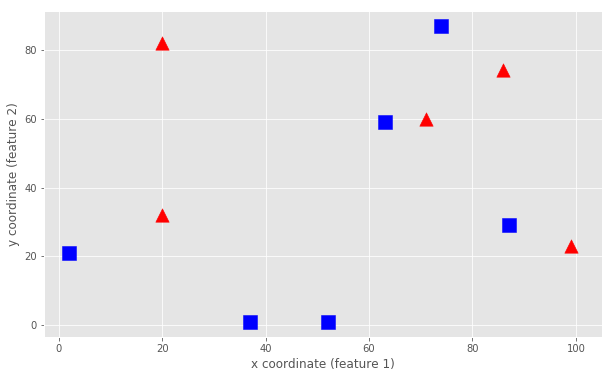

In [12]:
plot_data(blue, red)

In [13]:
# 2. 분류기 훈련
knn = cv2.ml.KNearest_create()

In [14]:
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [15]:
# 3. 새로운 데이터 요소의 레이블 예측 (findNearest)
newcomer, _ = generate_data(1)

In [16]:
newcomer

array([[91., 59.]], dtype=float32)

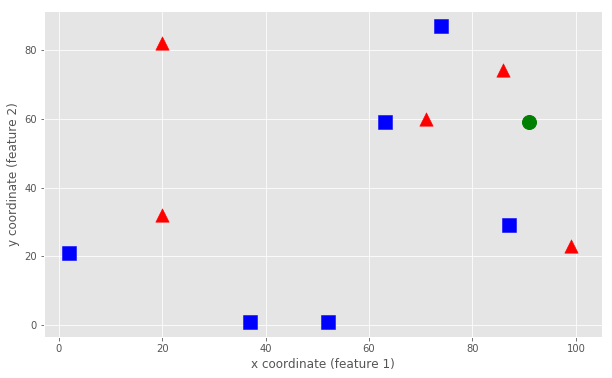

In [20]:
# plot에 newcomer 추가
plot_data(blue, red)
plt.plot(newcomer[0,0], newcomer[0,1], 'go', markersize=14)

In [37]:
# k = 1 의 경우
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor\t", dist)

Predicted label:	 [[1.]]
Neighbor's label:	 [[1.]]
Distance to neighbor	 [[250.]]


In [39]:
# k = 7 의 경우
ret, results, neighbor, dist = knn.findNearest(newcomer, 7)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor\t", dist)

Predicted label:	 [[0.]]
Neighbor's label:	 [[1. 1. 0. 0. 0. 1. 0.]]
Distance to neighbor	 [[ 250.  401.  784.  916. 1073. 1360. 4885.]]
